<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>  </center></font></h1>
<h2><font color='0B5345'> <center>Practica 5: Análisis frecuencial de señales </center></font></h2>
<font  face="Courier New" size="3">
<p1><center> Catalina Guerra - Juan Esteban Campillo - Angie Tovar</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>


##**Representación de señales**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fft
from scipy.signal import find_peaks
from scipy.io import loadmat
from scipy.signal import welch, butter, filtfilt
from scipy.fft import ifft

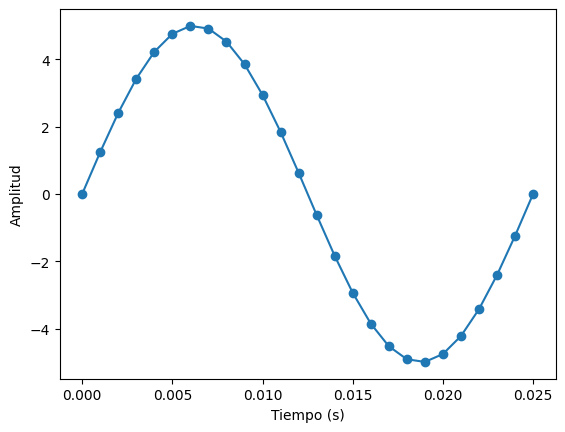

In [ ]:
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


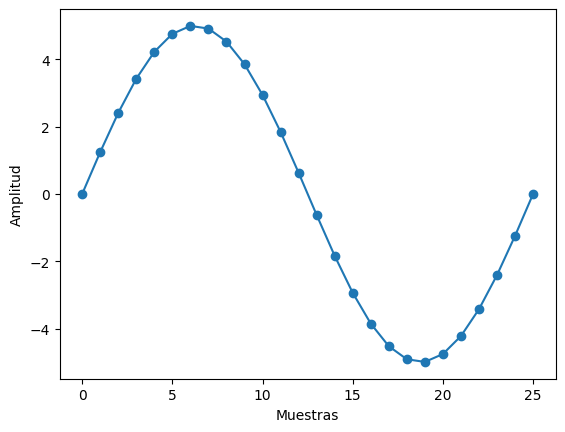

In [ ]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


In [ ]:
x == x1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False])

*a) Compruebe que los valores de las primeras cinco muestras son los mismos*

**R/** Se comprueba qeu los primeros 5 valores de la señal en el tiempo y en muestras son los mismos, termina siendo lo mismo porque Fo* t = fo * n, ya que las muestras corresponden al mismo vector de tiempo pero amplificado.

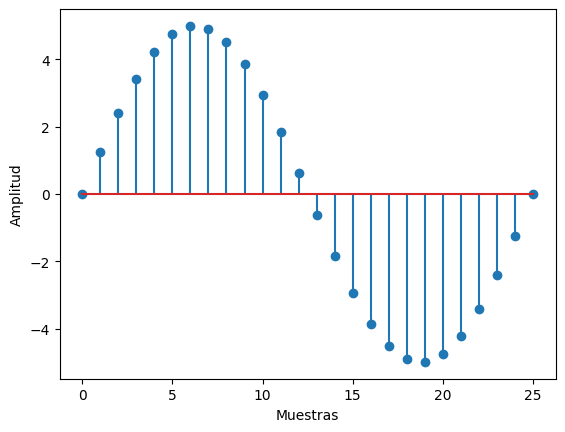

In [ ]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


##**Energia y potencia en el dominio del tiempo**

In [ ]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)


In [ ]:
print(potencia), print(potencia10)

12.500000000000002
12.500000000000005


(None, None)

*b) La potencia es la misma que en 𝑥(𝑛). ¿Por qué?*

**R/** Como se observa en la celda anterior, a potencia media de la señal no cambia cuando se analiza varios ciclos de la sinusoide, ya que esta es una medida normalizada que considera tanto la energía total de la señal como la duración durante la cual esa energía se distribuye.

##**Aplicación**

**1**  *Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40,80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal,y utilice la frecuencia de muestreo necesaria para representarla apropiadamente*

**Frecuencia de muestreo minima:**  Según la teoria la frecuencia minima de muestreo es [1]:

       fs >= 2 * fmax

En este caso la frecuencia max es 160Hz por lo tanto

      fs >= 2 * 160 Hz = 320 Hz

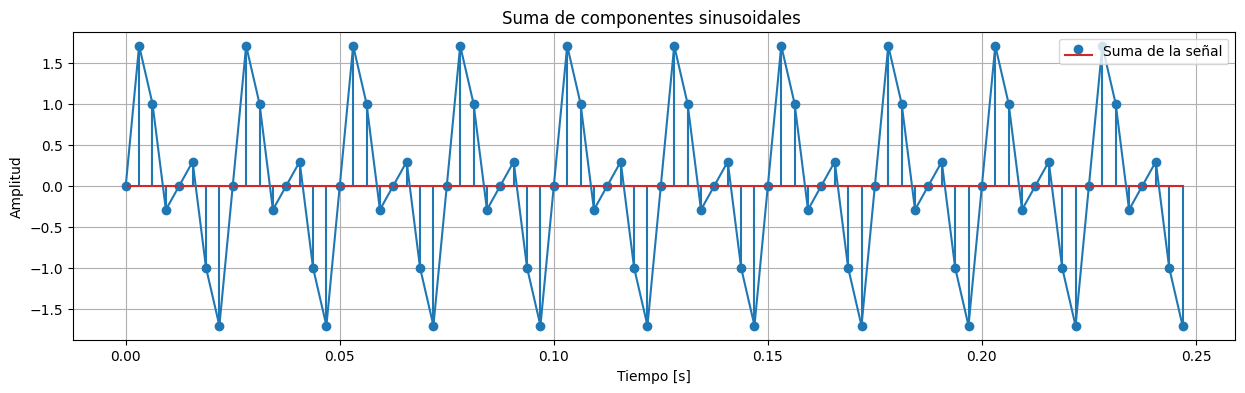

In [ ]:
Fo = 40
Fo1 = 80
Fo2 = 160
Fs = 320
T = 1 / Fs
t = np.arange(0, 0.025*10, T)

x = np.sin(2 * np.pi * Fo * t)
x1 = np.sin(2 * np.pi * Fo1 * t)
x2 = np.sin(2 * np.pi * Fo2 * t)

suma = x + x1 + x2

plt.figure(figsize=(15, 4))
plt.stem(t, suma, label='Suma de la señal')
plt.plot(t, suma)
plt.title('Suma de componentes sinusoidales ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


**2.** *Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal)*

Frecuencias que componen la señal: [ 40.  80. 240. 280.]


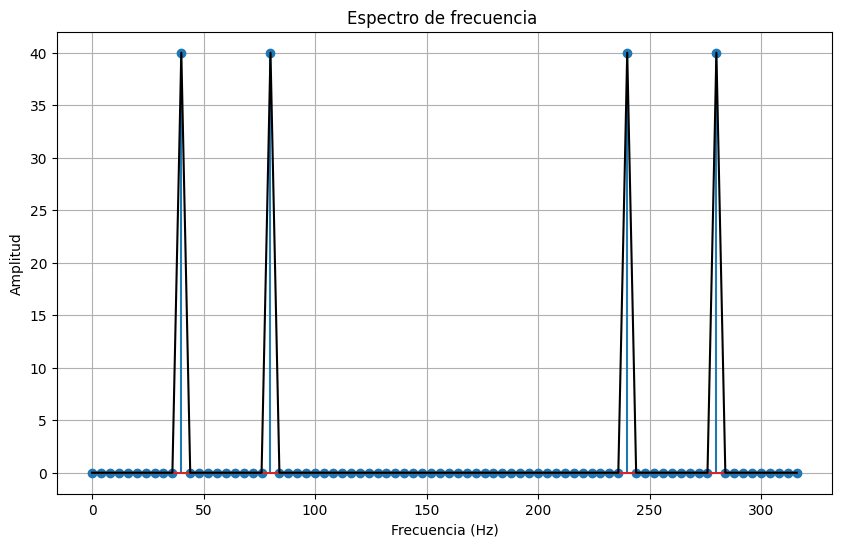

In [ ]:
transformada_suma = fft.fft(suma)

N = len(transformada_suma)
F = np.arange(0,N)*Fs/N

amplitudes = np.abs(transformada_suma)

amplitud = 40
tolerancia = 0.5
indices_cercanos = np.where((amplitudes >= amplitud - tolerancia) & (amplitudes <= amplitud + tolerancia))
frecuencias_cercanas = F[indices_cercanos]
print("Frecuencias que componen la señal:", frecuencias_cercanas)



plt.figure(figsize=(10, 6))
plt.stem(F,abs(transformada_suma))
plt.plot(F,abs(transformada_suma),'black')
plt.title('Espectro de frecuencia ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


**3.** *Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior*

**Transformada inversa de Fourier**  se encuentra con la función de numpy np.fft.ifft(), que devuelve al dominio del tiempo [2].

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


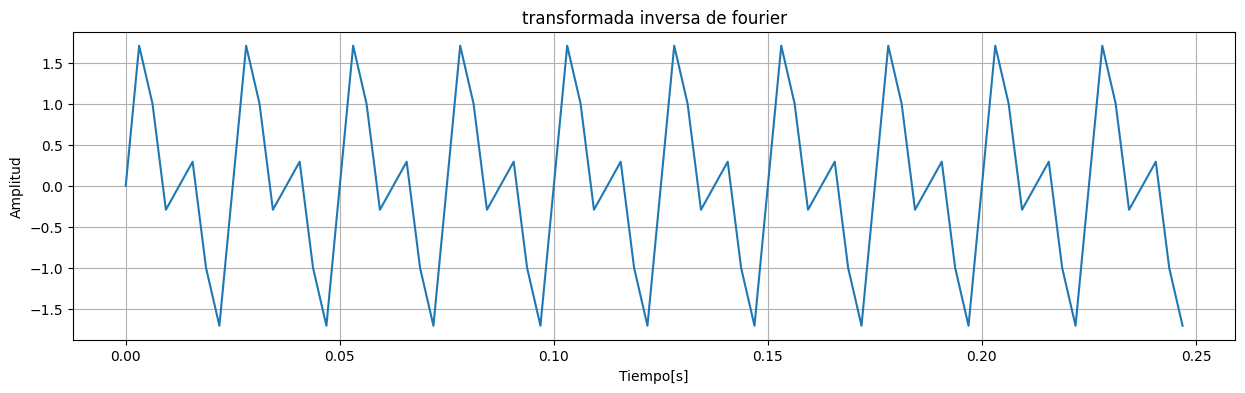

In [ ]:
señal_inversa= np.fft.ifft(transformada_suma)
plt.figure(figsize=(15,4))
plt.plot(t,señal_inversa)
plt.title('transformada inversa de fourier')
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud')
plt.grid(True)


**4.**  *¿Podría decir que las siguientes líneas aplican un filtro?¿Por qué?
Extraiga de manera similar cada una de las componentes de la señal*

In [ ]:
F1 = np.fft.fft(x); # Se cálcula la transformada de Fourier y se guarda en F1
F2 = np.zeros((len(F1))); # Se crea un arreglo de ceros, del tamaño de la transformada previamente cálculada(F1) y se guarda en F2
F2[9:13] = F1[9:13]; # Se copian los valores de F1 de los indices del 9-12 en F2
xr = np.fft.ifft(F2); # Se cálcula la transformada inversa de Fourier y se guarda en Xr
fig = plt.figure() # Se crea una figura para graficar
ax = fig.add_subplot(111) # Se agrega un único gráfico a la figura
ax.plot(t, np.real(xr)) # Se grafica el tiempo vs la parte real de la transformada inversa de Fourier
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)'); # Se ponen las etiquetas de los ejes para la gráfica

#Introducción al análisis frecuencial de señales Bioseñales y sistemas
plt.show()

**/R** Las lineas si aplican un filtro, ya que, primero, se calcula la transformada de Fourier de la señal original, lo que permite obtener sus componentes de frecuencia. luego, se crea un nuevo arreglo de ceros endonde  solo se copian ciertos componentes de frecuencia de la transformada, manteniendo únicamente los índices del 9 al 12 y eliminando el resto. Finalmente, se aplica la transformada inversa de Fourier para reconstruir la señal en el dominio del tiempo utilizando solo las frecuencias seleccionadas. Por lo tanto puede considerarse como un filtro ya que permite que solo ciertas frecuencias pasen.

<ipython-input-18-bd52db6356ca>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[38:42] = F1[38:42];


70.0


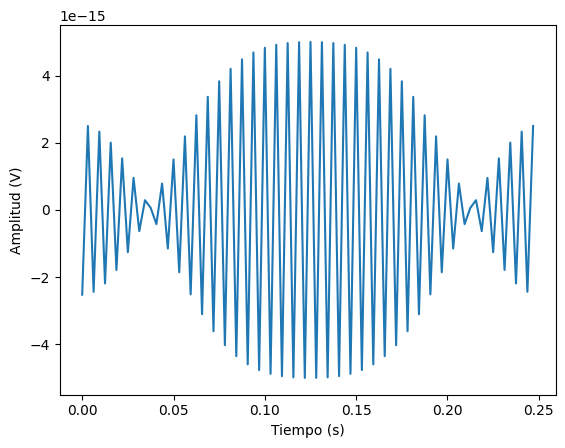

In [ ]:
F1 = np.fft.fft(suma);
F2 = np.zeros((len(F1)));
F2[38:42] = F1[38:42];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');

k= (280*len(x))/320
print(k)


**5.** *El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)*

In [ ]:
mat_data = loadmat('senecg.mat')
signal_ecg = mat_data['ECG'].flatten()

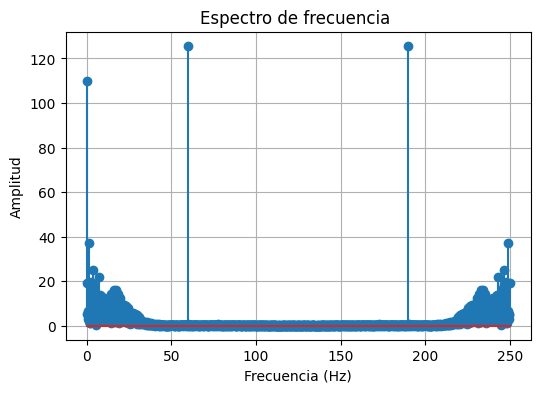

In [ ]:
transformada_suma = fft.fft(signal_ecg)
Fs= 250
N = len(transformada_suma)
F = np.arange(0,N)*Fs/N

amplitudes = np.abs(transformada_suma)
plt.figure(figsize=(6, 4))
plt.stem(F,abs(transformada_suma))
#plt.plot(F,abs(transformada_suma),'r--')
plt.title('Espectro de frecuencia ')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


Esta gráfica nos permite evidenciar el rango de frecuencias en la que se encuentra la señal de interés. Se encuentra en un intervalo de frecuencias entre 0 y 40 Hz.

**Ancho de ventana:** Las ventanas  grandes Ofrecen mejor resolución en frecuencia, pero peor resolución temporal , mientras que las ventanas más pequeñas mejoran la resolución temporal a costa de la resolución en frecuencia. Como se tiene 1250 datos y una frecuencia de muestreo baja,se escoje una ventana de 500 datos, que cubre 2 segundos de señal, lo cual es razonable para el análisis de señales ECG, ya que nos permite ver varios ciclos del complejo PQRS (dura entre 0,07 y 0,10 segundos.)[3] .  

**Solapamiento:** Se toma un solapamiento del 50%,ya que este permite que el centro del siguiente segmento de datos se alinee con el final del segmento anterior, justo donde la ventana de Hanning tiene un valor mínimo. Lo que significa que el punto donde un segmento anterior tiene muy poca contribución a la señal es exactamente el punto donde el siguiente segmento tiene su máxima contribución. Esto permite que se pierda la menor información posible de los datos [4].

Text(0.5, 1.0, 'Periodograma de Welch - Señal original')

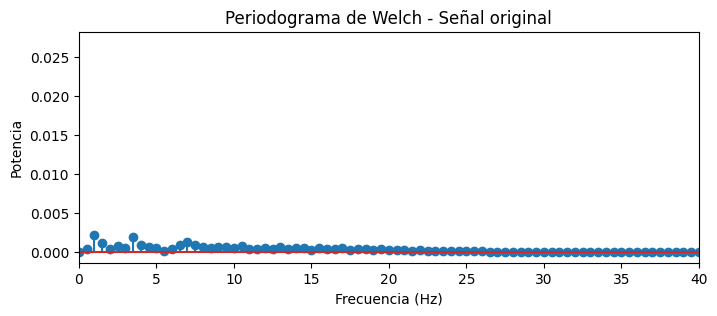

In [ ]:
fs = 250
ancho_ventana = 500
solapamiento = int(ancho_ventana / 2)
window = np.hanning(ancho_ventana)


# periodograma de Welch (señal original)
f, Pxx = welch(signal_ecg, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(8,3))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 40])
plt.title('Periodograma de Welch - Señal original')



Como se puede observar en el periodograma de Welch, la señal tiene muy poca energía en las frecuencias mostradas. Por esto, se decide aplicar un filtro pasabanda para concentrar la energía en las frecuencias relevantes, que como se mostró anteriormente, van de 0 a 40 Hz.

<ipython-input-30-f3c387fafcae>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[0:40] = F1[0:40];


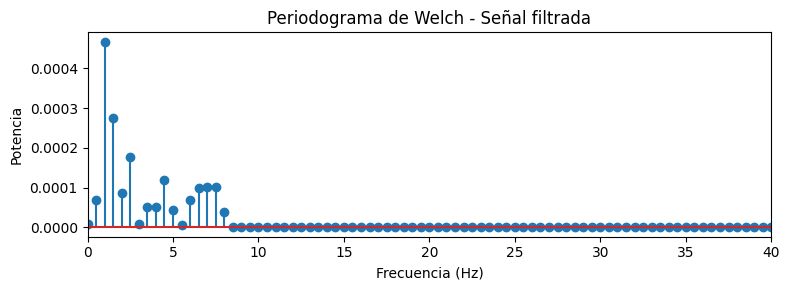

In [ ]:
#filtrado anterior - pasabanda

F1 = np.fft.fft(signal_ecg);
F2 = np.zeros((len(F1)));
F2[0:40] = F1[0:40];
xr = np.fft.ifft(F2);

# periodograma de Welch (señal filtrada)
f_filtrada, Pxx_filtrada = welch(np.real(xr), fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(8,3))
plt.stem(f_filtrada, Pxx_filtrada)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 40])
plt.title('Periodograma de Welch - Señal filtrada')

plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Señal recuperada')

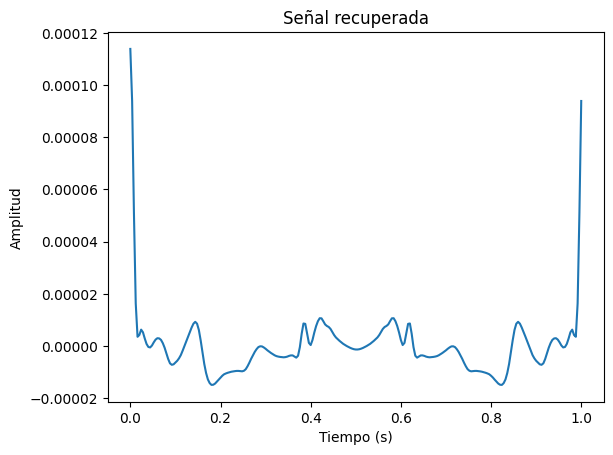

In [ ]:
# Calcular la transformada inversa de Fourier de la señal filtrada
signal_recuperada = ifft(Pxx_filtrada)
t= np.arange(0,len(signal_recuperada)/fs,1/fs)
plt.plot(t, signal_recuperada)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal recuperada')

**6.** Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja)

In [ ]:
mat_data_P = loadmat('P049_EP_reposo.mat')
parkinson = mat_data_P['data']
mat_data_C = loadmat('C049_EP_reposo.mat')
control = mat_data_C['data']


In [ ]:
señal_p = parkinson[0,:,4].flatten()
señal_c = control[0,:,4].flatten()

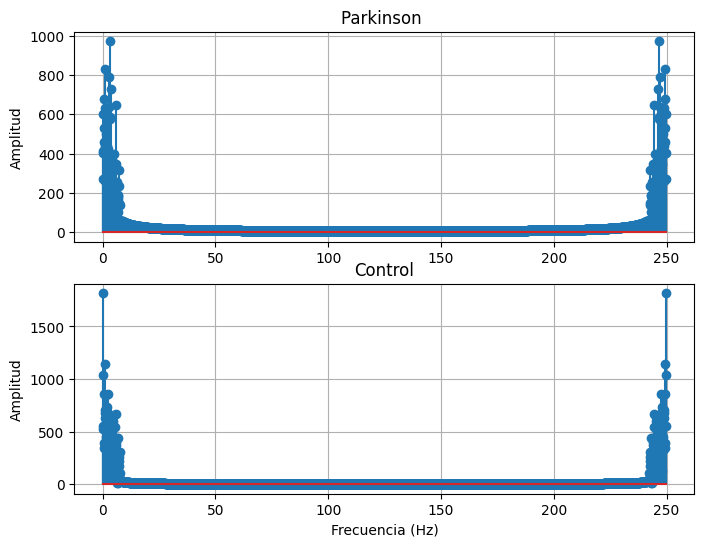

In [ ]:
transformada_P = fft.fft(señal_p)
transformada_C = fft.fft(señal_c)
Fs= 250
Np = len(transformada_P)
Nc = len(transformada_C)
FP = np.arange(0,Np)*Fs/Np
FC = np.arange(0,Nc)*Fs/Nc


plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.stem(FP,np.abs(transformada_P))
plt.title('Parkinson ')
plt.ylabel('Amplitud')
plt.grid(True)
plt.subplot(2,1,2)
plt.stem(FC,np.abs(transformada_C))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Control')
plt.grid(True)
plt.show()

Esta gráfica nos permite evidenciar el rango de frecuencias en la que se encuentra la señal de interés. Se encuentra en un intervalo de frecuencias entre 0 y 10 Hz.

**Ancho de ventana:**  Se tiene 2000 datos y una frecuencia de muestreo de 250, como la mayoría de datos se concentran en bajas frecuencias, se escoje una ventana de 500 datos que es lo suficientemente grande para obtener una buena resolución en frecuencia.


**Solapamiento:** Al igual que la señal anterior se toma un solapamiento del 50%, con el objetivo de no perder mucha información de los datos[4].

Text(0.5, 1.0, 'Periodograma de Welch - Señal control')

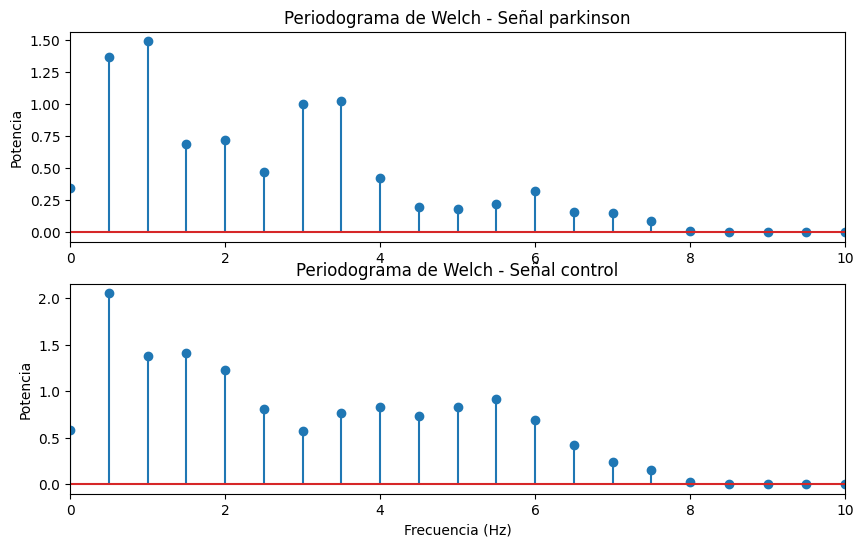

In [ ]:
fs = 250
ancho_ventana = 500
solapamiento = int(ancho_ventana / 2)
window = np.hanning(ancho_ventana)


# periodograma de Welch (señal original)
f, Pxx = welch(señal_p, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)
fc, Pxxc = welch(señal_c, fs, window=window, nperseg=ancho_ventana, noverlap=solapamiento)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.stem(f, Pxx)
plt.ylabel('Potencia')
plt.xlim([0, 10])
plt.title('Periodograma de Welch - Señal parkinson')

plt.subplot(2,1,2)
plt.stem(fc, Pxxc)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.xlim([0, 10])
plt.title('Periodograma de Welch - Señal control')

Ambas señales se encuentran de 0 a 8 Hz [5] , donde se encuentran las ondas delta o theta, que indican un estado de reposo y relajación.

La señal de Parkinson presenta su pico máximo de potencia 1.5 alrededor de 1Hz, con una mayor dispersión de picos que se extiende hasta cerca de 6 Hz, mientras que la señal de control tiene su pico principal en 0.5 Hz con un valor aproximado de 2.2, seguido de una disminución rápida en la potencia. La señal de Parkinson muestra una distribución más amplia de energía a lo largo de varias frecuencias, en contraste con la señal de control, que concentra su energía en las frecuencias más bajas y tiene picos más definidos.

Según un estudio, Los pacientes con parkinson presentan una disminución para las frecuencias theta y delta en comparación con los sujetos sanos, esto podría justificar su disminución de potencia respecto a la señal control [6].


##**Conclusiones**

1. Con el análisis frecuencial de señales se pudo descomponer, filtrar y procesar las señales identificando componentes esenciales y ruido. El uso de la Transformada de Fourier y el periodograma de Welch permitió no solo visualizar las características frecuenciales claves, sino también aplicar un filtrado eficaz que mejora la calidad de las señales. En esta practica se pudo evidenciar la importancia de estos métodos en el procesamiento de las bioseñales y su potencial en aplicaciones clínicas para identificar diferencias entre sujetos sanos y patológicos.

2. El método de filtrado en el dominio de la frecuencia empleado en este proyecto permite manipular componentes de una señal mediante la Transformada de Fourier. Al calcular la transformada de la señal original y crear un nuevo arreglo que conserva solo ciertas frecuencias, se eliminan las demás al establecer sus valores en cero. Este proceso mejora la calidad de la señal al eliminar ruido y resaltar características clave, facilitando así el análisis y diagnóstico de bioseñales.

3. El periodograma permite hacer un análisis de la energía presente en las diferentes frecuencias, se pudo evidenciar que la señal EEG al poseer ciertos patrones se puede usar un análisis de densidad espectral para evidenciar una patología relacionado con la energía en las frecuencias de las distintas ondas.

##**Referencias**

[1]	«frec_Nyquist.pdf». Accedido: 24 de octubre de 2024. [En línea]. Disponible en: http://carina.fcaglp.unlp.edu.ar/senales/apuntes/frec_Nyquist.pdf

[2]	«numpy.fft.ifft — Manual de NumPy v2.2.dev0». Accedido: 24 de octubre de 2024. [En línea]. Disponible en: https://numpy.org/devdocs/reference/generated/numpy.fft.ifft.html

[3]	«Electrocardiografía - Trastornos cardiovasculares», Manual MSD versión para profesionales. Accedido: 24 de octubre de 2024. [En línea]. Disponible en: https://www.msdmanuals.com/es/professional/trastornos-cardiovasculares/pruebas-y-procedimientos-cardiovasculares/electrocardiografía

[4]	«Overlap: What, Why and How to use it». Accedido: 24 de octubre de 2024. [En línea]. Disponible en: https://community.sw.siemens.com/s/article/Overlap-What-Why-and-How-to-use-it

[5]	«Tipos de ondas cerebrales: Delta, Theta, Alfa, Beta y Gamma». Accedido: 24 de octubre de 2024. [En línea]. Disponible en: https://lamenteesmaravillosa.com/tipos-de-ondas-cerebrales/

[6]	«Las ondas cerebrales pueden predecir el deterioro cognitivo en la enfermedad de Parkinson | Carver College of Medicine». Accedido: 24 de octubre de 2024. [En línea]. Disponible en: https://medicine.uiowa.edu/content/brain-waves-may-predict-cognitive-impairment-parkinsons-disease

